In [61]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [62]:
data_dir = 'data/depthDataset/captures/'

In [4]:
def get_picture(_id, _dir=data_dir):
    rgb = cv2.imread(os.path.join(_dir, f'{_id}_scene.png'))
    seg = cv2.imread(os.path.join(_dir, f'{_id}_seg.png'))
    depth = cv2.imread(os.path.join(_dir, f'{_id}_depth.png'), -1)
    return (rgb, seg, depth)

In [5]:
rgb, seg, depth = get_picture('7')

In [6]:
def imshow(image):
    plt.imshow(image[:,:,::-1])

In [63]:
from depth_dataset import process

In [90]:
normals, normals_viz, seg_mask = process(rgb, depth, seg)

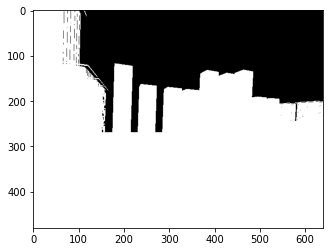

In [91]:
imshow(seg_mask)

In [82]:
depth = depth.astype(np.float64)
depth

array([[ 6625.,  6648.,  6671., ..., 65535., 65535., 65535.],
       [ 6621.,  6644.,  6667., ..., 65535., 65535., 65535.],
       [ 6617.,  6636.,  6660., ..., 65535., 65535., 65535.],
       ...,
       [ 7164.,  8921.,  7171., ...,  2843.,  2847.,  2851.],
       [ 8929.,  7152.,  7179., ...,  2837.,  2837.,  2841.],
       [ 7132.,  7160.,  7187., ...,  2839.,  2837.,  2833.]])

In [8]:
depth.shape

(480, 640)

(array([107780.,  55641.,  31214.,  12299.,   5960.,    416.,    211.,
             0.,      0.,  93679.]),
 array([ 2726. ,  9006.9, 15287.8, 21568.7, 27849.6, 34130.5, 40411.4,
        46692.3, 52973.2, 59254.1, 65535. ]),
 <BarContainer object of 10 artists>)

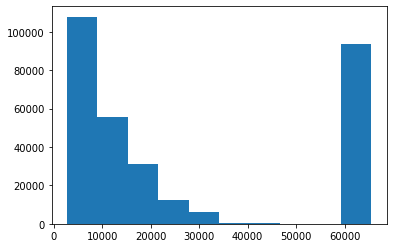

In [9]:
plt.hist(depth.ravel())

In [70]:
depth_vec = np.zeros((*depth.shape, 3))

In [71]:
indices_row = np.arange(depth.shape[0])
indices_r = np.hstack([indices_row.reshape(-1,1)]*depth.shape[1]).ravel()

In [72]:
indices_col = np.arange(depth.shape[1])
indices_c = np.vstack([indices_col.reshape(1,-1)]*depth.shape[0]).ravel()

In [73]:
ind_mat = np.vstack((indices_r, indices_c, np.ones(indices_r.shape[0])))


In [84]:
depth_vec = K_inv @ ind_mat
depth_vec /= np.linalg.norm(depth_vec, axis=0)
depth_vec *= depth.ravel()
depth_vec = depth_vec.T.reshape(*depth.shape,-1)

In [85]:
depth_vec

array([[[ -4138.60469005,  -3103.95351754,   4138.60469005],
        [ -4156.76841083,  -3104.58640684,   4156.76841083],
        [ -4174.95288961,  -3105.12121165,   4174.95288961],
        ...,
        [-34835.64009007,  43217.96598674,  34835.64009007],
        [-34797.49416493,  43279.38336764,  34797.49416493],
        [-34759.37778538,  43340.59917614,  34759.37778538]],

       [[ -4128.2101792 ,  -3105.8634577 ,   4141.15127694],
        [ -4146.34620182,  -3106.51016374,   4159.34415229],
        [ -4164.50302223,  -3107.05868116,   4177.55789064],
        ...,
        [-34757.4344096 ,  43256.11743138,  34866.39188424],
        [-34719.3070058 ,  43317.5052925 ,  34828.1449588 ],
        [-34681.20935397,  43378.69132361,  34789.92787859]],

       [[ -4117.7963064 ,  -3107.77079728,   4143.69439638],
        [ -4133.41297337,  -3106.55880703,   4159.40928138],
        [ -4152.1631514 ,  -3107.59380513,   4178.27738505],
        ...,
        [-34679.02157589,  43294.25020638,

In [76]:
fx = fy= 320
cx = 320
cy = 240

In [77]:
K = np.array([[fx, 0, cx],[0,fy,cy],[0,0,1]]) 

In [78]:
K_inv = np.linalg.inv(K)
K_inv

array([[ 0.003125,  0.      , -1.      ],
       [ 0.      ,  0.003125, -0.75    ],
       [ 0.      ,  0.      ,  1.      ]])

In [41]:
for i in range(depth.shape[0]):
  for j in range(depth.shape[1]):
    if(depth[i,j] >= 55000):
      continue
    depth_vec[i,j] = (K_inv @ np.array([i,j,1]).reshape(-1,1)).reshape(-1)
    depth_vec[i,j] /= np.linalg.norm(depth_vec[i,j])
    depth_vec[i,j] *= depth[i,j]

In [79]:
normals = np.zeros((*depth.shape, 3))
for i in range(1,depth.shape[0]-1):
    for j in range(1, depth.shape[1] - 1):
      # if depth[i,j] <= 55000:
      dzdx = (depth_vec[i+1,j] - depth_vec[i-1,j])
      dzdy = (depth_vec[i,j+1] - depth_vec[i,j-1])
      normal = np.cross(dzdx, dzdy)
      normals[i,j] = normal / np.linalg.norm(normal)
      # else:
      #   normals[i,j] = [-1,-1,-1]

In [80]:
color = ((normals * 0.5 + 0.5) * 255).astype('int')

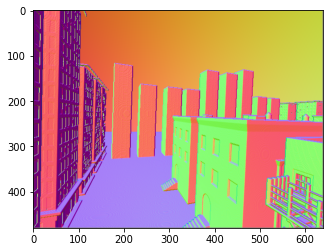

In [81]:
imshow(color)

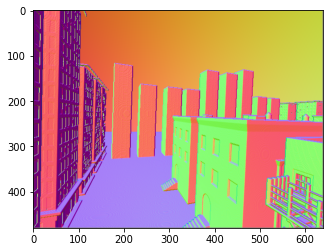

In [35]:
imshow(color)

In [38]:
segm = seg > 0

ValueError: operands could not be broadcast together with shapes (480,640) (480,640,3) () 

In [57]:
seg_mask_2D = cv2.cvtColor(seg, cv2.COLOR_BGR2GRAY)
seg = np.repeat(seg_mask_2D[:,:,np.newaxis], repeats=3, axis=2)

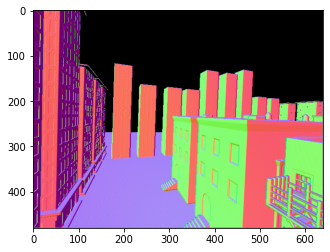

In [60]:
imshow(np.where(seg, color, 0))

In [50]:
cv2.cvtColor(seg, cv2.COLOR_BGR2GRAY)

array([[ 88,  88,  88, ...,   0,   0,   0],
       [ 88,  88,  88, ...,   0,   0,   0],
       [ 88,  88,  88, ...,   0,   0,   0],
       ...,
       [ 88,  92,  88, ..., 149, 149, 149],
       [ 92,  88,  88, ..., 149, 149, 149],
       [ 88,  88,  88, ..., 149, 149, 149]], dtype=uint8)